In [2]:
import csv
import pandas as pd
data = pd.read_csv('clean_docs_50_complete_share.csv')
data.head()

,Unnamed: 0,pmid,title,abstract,include/exclude,drugs,disease,study type,association
0,0,27989839,Cilostazol and enzymatically modified isoquerc...,We previously reported the anti-inflammatory e...,include,cilostazol,colorectal cancer,In Vitro,Effective
1,1,26878064,Zinc Ionophore (Clioquinol) Inhibition of Huma...,Prostate cancer remains the second leading cau...,include,clioquinol,prostate cancer,In Vivo,Effective
2,2,20798593,Use of dabigatran etexilate to reduce breast c...,Coagulation proteases and the generation of th...,include,dabigatran etexilate,breast cancer,In Vitro/In Vivo,Effective
3,3,30685222,A study in a rat initiation-promotion bladder ...,"Dapagliflozin, a sodium-glucose co-transporter...",include,dapagliflozin,bladder cancer,In Vivo,No effect
4,4,23074173,"The iron chelator, deferasirox, as a novel str...",Deferasirox is an orally effective iron (Fe) c...,include,deferasirox,lung carcinoma,In Vitro/In Vivo,Effective


In [3]:
for type1 in data['study type'].unique():
    for ind in list(data[data['study type']==type1].index):
        print(type1)
        print(data.loc[ind]['abstract'])
        print("\n")

In Vitro
We previously reported the anti-inflammatory effects of cilostazol, a selective inhibitor of phosphodiesterase 3, and two antioxidants, enzymatically modified isoquercitrin and  -lipoic acid in a dextran sodium sulphate-induced colitis mouse model. We further examined the chemopreventive effects of these substances in a murine azoxymethane/dextran sodium sulphate -induced colorectal carcinoma model and compared the effects with those of the well-known anticancer natural plant pigment, anthocyanin. In addition, the effects on cell proliferation activity were evaluated in colon cancer cell lines and mucosal epithelial cells in a model of acute dextran sodium sulphate-induced colitis. Cilostazol and enzymatically modified isoquercitrin improved the outcome of azoxymethane/dextran sodium sulphate-induced colorectal cancer along with anthocyanin though inhibiting inflammation and cell proliferation, but the effect of  -lipoic acid was minimal. Inhibition of cell proliferation by ci

In [ ]:
clinical trials: clinical trial, clinic, individuals, individual
in vitro / vivo:
in vitro: vitro, assays, cell lines
in vivo: vivo, mice, rats, mouse, rat

['In Vitro' 'In Vivo' 'In Vitro/In Vivo' nan]
vitro count 0 0
vivo count 0 1
['mouse']
0 ground truth In Vitro 

vitro count 0 0
vivo count 0 1
['mice']
1 ground truth In Vivo 

vitro count 0 0
vivo count 1 3
['vivo', 'mice', 'mice']
2 ground truth In Vitro/In Vivo 

vitro count 0 0
vivo count 0 2
['rats', 'rats']
3 ground truth In Vivo 

vitro count 1 1
vivo count 1 2
['vitro', 'vivo', 'mice']
4 ground truth In Vitro/In Vivo 

vitro count 1 1
vivo count 1 1
['vivo', 'vitro']
5 ground truth In Vitro/In Vivo 

vitro count 0 0
vivo count 0 3
['mice', 'mice', 'mice']
6 ground truth In Vivo 

vitro count 1 1
vivo count 1 1
['vitro', 'vivo']
7 ground truth In Vitro/In Vivo 

vitro count 0 0
vivo count 0 1
['mice']
8 ground truth In Vitro/In Vivo 

vitro count 1 1
vivo count 2 4
['vitro', 'vivo', 'vivo', 'mice', 'mouse']
9 ground truth In Vitro/In Vivo 

vitro count 1 1
vivo count 2 3
['vitro', 'vivo', 'mice', 'vivo']
10 ground truth In Vitro/In Vivo 

vitro count 0 0
vivo count 0 0
[]
11 gr

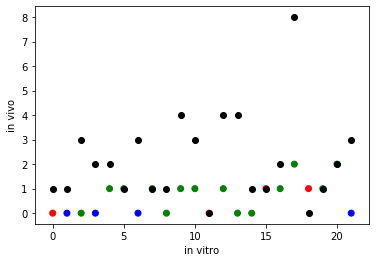

In [41]:
import nltk
import matplotlib.pyplot as plt

def study_type(text):
    vitro_keywords = dict({'vitro': 0})
    vivo_keywords = dict({'vivo': 0, 'mice': 0, 'rats': 0, 'mouse': 0, 'rat': 0})
    vitro_list = ['vitro']
    vivo_list = ['vivo', 'mice', 'mouse', 'rats', 'rat']
    vocab_list = []
    for word in text.split():
        if word in vitro_list:
            vocab_list.append(word)
            vitro_keywords[word] += 1
        if word in vivo_list:
            vocab_list.append(word)
            vivo_keywords[word] += 1
    x = sum(vitro_keywords.values())
    y = sum(vivo_keywords.values())
    print("vitro count", vitro_keywords['vitro'], x)
    print("vivo count", vivo_keywords['vivo'], y)
    print(vocab_list)
    return x, y
            
x_vec = []
y_vec = []
color_vec = []
types = data['study type'].unique()
print(types)
colors = dict({'In Vitro': 'red', 'In Vitro/In Vivo': 'green', 'In Vivo': 'blue'})
for i in range(len(data['abstract'])):
    x, y = study_type(data['abstract'][i])
    if type(data["study type"][i]) == float:
        continue
    else:
        x_vec.append(x)
        y_vec.append(y)
        color_vec.append(colors[data["study type"][i]])
    print(i, "ground truth", data["study type"][i], "\n")

plt.scatter([i for i in range(len(x_vec))], x_vec, color=color_vec)
plt.scatter([i for i in range(len(y_vec))], y_vec, color='black')
plt.xlabel('in vitro')
plt.ylabel('in vivo')
plt.show()

In [42]:
!pip install allennlp

     |████████████████████████████████| 7.6MB 4.8MB/s eta 0:00:01
     |████████████████████████████████| 163kB 17.8MB/s eta 0:00:01
     |████████████████████████████████| 133kB 19.5MB/s eta 0:00:01
     |████████████████████████████████| 256kB 15.4MB/s eta 0:00:01
     |████████████████████████████████| 4.2MB 15.1MB/s eta 0:00:01
     |████████████████████████████████| 102kB 17.8MB/s ta 0:00:01
     |████████████████████████████████| 51kB 11.3MB/s eta 0:00:01
     |████████████████████████████████| 51kB 9.7MB/s  eta 0:00:01
     |████████████████████████████████| 34.7MB 1.1MB/s eta 0:00:011    |█████▊                          | 6.3MB 20.3MB/s eta 0:00:02     |███████████████████████████████▋| 34.3MB 6.3MB/s eta 0:00:01
     |████████████████████████████████| 61kB 11.6MB/s eta 0:00:01
     |████████████████████████████████| 204kB 16.9MB/s eta 0:00:01
     |████████████████████████████████| 1.1MB 14.8MB/s eta 0:00:01
     |████████████████████████████████| 686kB 13.1MB/s eta 0:00:01
  

     |████████████████████████████████| 327kB 6.7MB/s eta 0:00:01
     |████████████████████████████████| 133kB 17.7MB/s eta 0:00:01
     |████████████████████████████████| 153kB 17.1MB/s eta 0:00:01
     |████████████████████████████████| 276kB 13.8MB/s eta 0:00:01
     |████████████████████████████████| 61kB 18.6MB/s eta 0:00:01
     |████████████████████████████████| 2.9MB 23.8MB/s eta 0:00:01
     |████████████████████████████████| 3.0MB 31kB/s eta 0:00:0101
  ERROR: Command errored out with exit status 1:
   command: /anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/qt/kh_gt5vd5vq1g7vbl8lk25zh0000gn/T/pip-install-nxx67017/jsonnet/setup.py'"'"'; __file__='"'"'/private/var/folders/qt/kh_gt5vd5vq1g7vbl8lk25zh0000gn/T/pip-install-nxx67017/jsonnet/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d

  Created wheel for parsimonious: filename=parsimonious-0.8.1-cp36-none-any.whl size=41904 sha256=f9e2f31a0f4416b39cda378d76f589c7502d6e0bf140e426d5ee5058b9f4829c
  Stored in directory: /Users/sejaldua/Library/Caches/pip/wheels/b7/8d/e7/a0e74217da5caeb3c1c7689639b6d28ddbf9985b840bc96a9a
  Created wheel for overrides: filename=overrides-2.8.0-cp36-none-any.whl size=5616 sha256=db3cda938f9341f465b046d7bf52c43640c36219960d2411cba8fe0f76946ae3
  Stored in directory: /Users/sejaldua/Library/Caches/pip/wheels/df/f1/ba/eaf6cd7d284d2f257dc71436ce72d25fd3be5a5813a37794ab
  Created wheel for word2number: filename=word2number-1.1-cp36-none-any.whl size=4725 sha256=eb77e36619ecd8bf1b968369a42721fef7ce00ffbebe4552866096ee2c579633
  Stored in directory: /Users/sejaldua/Library/Caches/pip/wheels/46/2f/53/5f5c1d275492f2fce1cdab9a9bb12d49286dead829a4078e0e
  Created wheel for ftfy: filename=ftfy-5.6-cp36-none-any.whl size=43726 sha256=21e7f9a86d48bf65cb8838d6d7d4390f69f85c4051ea73b0a23e3074f74964d8
  S

ModuleNotFoundError: No module named 'allennlp'

In [45]:
import allennlp

ModuleNotFoundError: No module named 'allennlp'